# Risco em Aprendizado de Máquina

A aprendizagem de máquina é um campo que busca construir modelos eficientes a partir de dados. A eficácia de um modelo é essencial para garantir previsões precisas e confiáveis. Mas como podemos determinar se um modelo é 'bom'? O que exatamente significa um modelo 'bom'?

Essas perguntas nos levam aos conceitos de **risco empírico** e **risco estrutural**, que são fundamentais para avaliar o desempenho dos modelos de aprendizado de máquina.

## Risco Empírico vs. Risco Estrutural

- **Risco Empírico:** 
  Este é o erro observado nos dados de treinamento. Ele indica quão bem o modelo está se ajustando aos dados com os quais foi treinado, sendo uma medida do erro de treinamento. Por exemplo, se tivermos um modelo de regressão que apresenta um risco empírico alto, isso significa que ele não está se ajustando bem aos dados de treinamento (Underfitting), podendo ser necessário revisar suas características ou parâmetros.


- **Risco Estrutural:** 
  Este conceito é mais abstrato. Refere-se ao erro que esperamos ver em novos dados, ou seja, o erro em um conjunto de dados que o modelo nunca viu antes. Ele nos dá uma ideia da capacidade de generalização do modelo, sendo uma medida do erro de teste ou validação. Um modelo com baixo risco estrutural é capaz de fazer previsões precisas em dados não vistos anteriormente.

## A Importância do Equilíbrio

É crucial encontrar um equilíbrio entre o risco empírico e o risco estrutural. Se um modelo se ajusta perfeitamente aos dados de treinamento (risco empírico baixo), mas não generaliza bem para novos dados (risco estrutural alto), ele é considerado sobreajustado (overfitting). Por outro lado, um modelo que não se ajusta bem nem aos dados de treinamento pode estar subajustado (underfitting), indicando que pode ser muito simples para capturar a complexidade dos dados.

## Exemplo Prático

Imagine um modelo de classificação de e-mails em 'spam' ou 'não spam'. Se o modelo tem um risco empírico baixo, ele classifica corretamente a maioria dos e-mails no conjunto de treinamento. No entanto, se ele tem um risco estrutural alto, pode falhar ao classificar e-mails novos, marcando e-mails legítimos como spam ou permitindo que spam passe como e-mail legítimo.

## Conclusão

Entender o risco empírico e o risco estrutural é essencial para construir e avaliar modelos de aprendizado de máquina eficazes. Eles nos ajudam a entender os limites do que nossos modelos podem aprender e a encontrar um equilíbrio entre o ajuste aos dados de treinamento e a capacidade de generalização para novos dados.

Link com o datalhamento do dataset: https://www.kaggle.com/datasets/uciml/electric-power-consumption-data-set

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('consumo_de_energia.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307392 entries, 0 to 307391
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Global_active_power    307392 non-null  float64
 1   Global_reactive_power  307392 non-null  float64
 2   Voltage                307392 non-null  float64
 3   Global_intensity       307392 non-null  float64
 4   Sub_metering_1         307392 non-null  float64
 5   Sub_metering_2         307392 non-null  float64
 6   Sub_metering_3         307392 non-null  float64
dtypes: float64(7)
memory usage: 16.4 MB


In [4]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,307392.000000,307392.000000,307392.000000,307392.000000,307392.000000,307392.000000,307392.000000
mean,1.094936,0.123738,240.834400,4.641457,1.110836,1.324524,6.495328
std,1.059686,0.112674,3.239736,4.454838,6.116527,5.907391,8.452119
min,0.078000,0.000000,224.420000,0.200000,0.000000,0.000000,0.000000
25%,0.310000,0.048000,238.980000,1.400000,0.000000,0.000000,0.000000
50%,0.608000,0.100000,241.010000,2.600000,0.000000,0.000000,1.000000
75%,1.530000,0.194000,242.880000,6.400000,0.000000,1.000000,17.000000
max,10.650000,1.218000,253.260000,46.400000,82.000000,79.000000,31.000000


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Separa os dados em X e y
scaler_X = MinMaxScaler()
X = df.drop('Global_active_power', axis = 1)
#tudo menos a classe alvo
scaler_y  = MinMaxScaler()
y = df[['Global_active_power']]
#somente a classe alvo

# Separa os dados em X e y de treinamento e temporários
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
#Aqui normalmente (vida real) se utiliza uns 30%, mas aqui para a aula, estmaos usando 50%, considerando o tamanho da base de dados

# Normaliza e ajusta o escalonizador com os dados de X de treinamento
X_train = scaler_X.fit_transform(X_train) #o escalonador se adequa a base de dados
# Normaliza e ajusta o escalonizador com os dados de y de treinamento
y_train = scaler_y.fit_transform(y_train)

# Ajusta os dados de X_temp
X_temp = scaler_X.transform(X_temp) #o transform é aplicado sem antes ajustar o transformador aos dados de teste. 
# Ajusta os dados de y_temp
y_temp = scaler_y.transform(y_temp)

# Separa os dados em X e y de validação e teste (70% para teste - 70% de 50% = 35% do total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.7, random_state=42)

# Risco Empírico

Quando falamos sobre treinar modelos de aprendizado de máquina, muitas vezes estamos tentando minimizar algum tipo de erro. No contexto de regressão, por exemplo, queremos minimizar a diferença entre as previsões do nosso modelo e os valores reais. Esta diferença é muitas vezes referida como "erro". e na maioria dos casos é utilizado o MSE dos dados de treinamento para calcular este erro.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping

# Função para criar o modelo com L1 e L2 (Elastic Net)
def create_l1_l2_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [7]:
# Primeiro, obtemos a dimensão dos dados de entrada. 
# 'X.shape[1]' retorna o número de características no conjunto de dados X.
input_shape = X.shape[1]

# Aqui, chamamos a função 'create_l1_l2_model' para criar o modelo.
# Passamos 'input_shape' como argumento para garantir que o modelo saiba quantos neurônios de entrada deve ter.
model = create_l1_l2_model(input_shape)

# Definimos o Early Stopping para o treinamento do modelo.
# 'monitor' é definido como 'val_loss', o que significa que o Early Stopping observará a perda no conjunto de validação.
# 'patience' é definido como 10, o que significa que o treinamento será interrompido se não houver melhoria na perda de validação por 10 épocas consecutivas.
# 'verbose' é definido como 1, o que significa que mensagens de log serão impressas durante o treinamento.
early_stopping = EarlyStopping(
    monitor='val_loss',  # Métrica a ser monitorada
    patience=3,  # Número de épocas sem melhoria após o qual o treinamento será interrompido
    verbose=1,  # Para exibir logs
    mode='min'  # O treinamento será interrompido quando 'val_loss' parar de diminuir
)

# Aqui, iniciamos o treinamento do modelo com o método 'fit'.
# 'X_train' e 'y_train' são os dados de treinamento e os rótulos correspondentes.
# 'epochs' é definido como 20, o que significa que o modelo passará pelos dados de treinamento 20 vezes no máximo.
# 'validation_data' é definido como '(X_val, y_val)', o que significa que o modelo será validado nesse conjunto de dados após cada época.
# 'callbacks' é definido como uma lista contendo 'early_stopping', o que significa que o Early Stopping será usado durante o treinamento.
model.fit(
    X_train, y_train,
    epochs=10,
    verbose=1,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/10
4803/4803 [==============================] - 5s 778us/step - loss: 0.0546 - val_loss: 0.0026
Epoch 2/10
4803/4803 [==============================] - 4s 761us/step - loss: 0.0026 - val_loss: 0.0026
Epoch 3/10
4803/4803 [==============================] - 4s 761us/step - loss: 0.0025 - val_loss: 0.0025
Epoch 4/10
4803/4803 [==============================] - 4s 758us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 5/10
4803/4803 [==============================] - 4s 752us/step - loss: 0.0025 - val_loss: 0.0025
Epoch 6/10
4803/4803 [==============================] - 4s 762us/step - loss: 0.0025 - val_loss: 0.0025
Epoch 7/10
4803/4803 [==============================] - 4s 786us/step - loss: 0.0025 - val_loss: 0.0025
Epoch 8/10
4803/4803 [==============================] - 4s 784us/step - loss: 0.0025 - val_loss: 0.0025
Epoch 9/10
4803/4803 [==============================] - 4s 790us/step - loss: 0.0025 - val_loss: 0.0025
Epoch 10/10
4803/4803 [==============================] - 4s 756u

In [8]:
from sklearn.metrics import mean_squared_error

# Usando o modelo para fazer previsões no conjunto de treinamento
predict = model.predict(X_train)

# Invertendo a normalização das previsões para obter os valores reais
predict = scaler_y.inverse_transform(predict)

# Invertendo a normalização dos valores reais de treinamento
real = scaler_y.inverse_transform(y_train)

# Calculando o Erro Quadrático Médio (MSE) entre os valores reais e as previsões
mse = mean_squared_error(real, predict)

# Imprimindo o MSE
print(f"Risco Empírico (MSE): {mse:.3f}")

4803/4803 [==============================] - 2s 476us/step
Risco Empírico (MSE): 0.004


O MSE baixo = risco empirico baixo ( o que não necessariamente quer dizer que temos um overfitting)


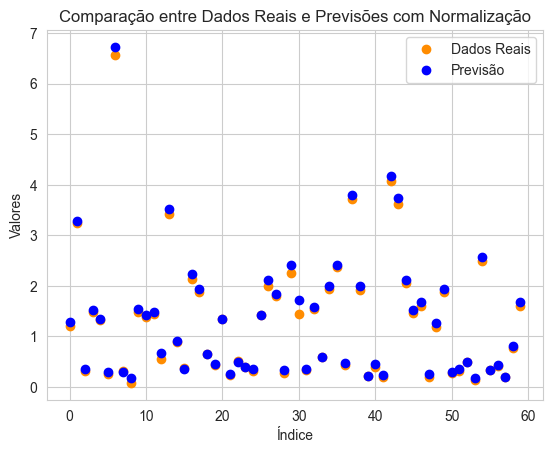

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns  # Importando seaborn para melhorar a estética dos gráficos

# Configurando o estilo do gráfico para um estilo mais bonito
sns.set_style("whitegrid")

# Criando um gráfico de linha para os dados reais
# Exibindo apenas os 60 primeiros valores
plt.plot(real[:60], 'o', color="darkorange", label="Dados Reais")

# Criando um gráfico de linha para as previsões
# Exibindo apenas os 60 primeiros valores
plt.plot(predict[:60], 'o', color="blue", label="Previsão")

# Definindo o rótulo do eixo X como 'Índice'
plt.xlabel("Índice")

# Definindo o rótulo do eixo Y como 'Valores'
plt.ylabel("Valores")

# Definindo o título do gráfico
plt.title("Comparação entre Dados Reais e Previsões com Normalização")

# Adicionando a legenda ao gráfico
plt.legend()

# Exibindo o gráfico
plt.show()

Epoch 1/10
4803/4803 [==============================] - 4s 759us/step - loss: 0.4634 - val_loss: 0.0768
Epoch 2/10
4803/4803 [==============================] - 4s 744us/step - loss: 0.0337 - val_loss: 0.0153
Epoch 3/10
4803/4803 [==============================] - 4s 760us/step - loss: 0.0082 - val_loss: 0.0059
Epoch 4/10
4803/4803 [==============================] - 4s 762us/step - loss: 0.0057 - val_loss: 0.0050
Epoch 5/10
4803/4803 [==============================] - 4s 750us/step - loss: 0.0051 - val_loss: 0.0050
Epoch 6/10
4803/4803 [==============================] - 4s 746us/step - loss: 0.0049 - val_loss: 0.0048
Epoch 7/10
4803/4803 [==============================] - 4s 756us/step - loss: 0.0047 - val_loss: 0.0044
Epoch 8/10
4803/4803 [==============================] - 4s 738us/step - loss: 0.0046 - val_loss: 0.0047
Epoch 9/10
4803/4803 [==============================] - 4s 748us/step - loss: 0.0046 - val_loss: 0.0044
Epoch 10/10
4803/4803 [==============================] - 2s 470u

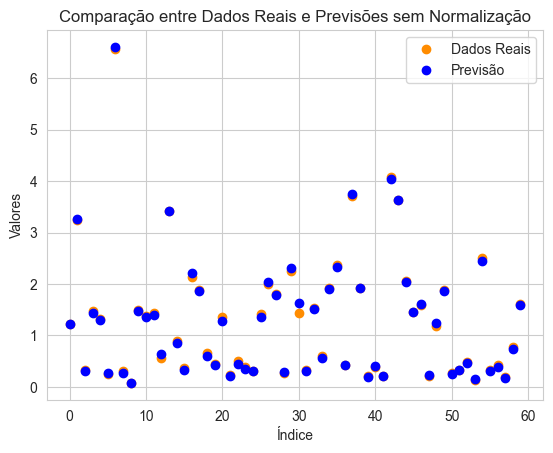

In [10]:
# Mesmo exemplo mas sem normalizar os dados
X = df.drop('Global_active_power', axis = 1)
y = df[['Global_active_power']]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.7, random_state=42)

input_shape = X.shape[1]

model = create_l1_l2_model(input_shape)

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    verbose=1,
    mode='min'
)

model.fit(
    X_train, y_train,
    epochs=10,
    verbose=1,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

predict = model.predict(X_train)
mse = mean_squared_error(y_train, predict)
print(f"Risco Empírico (MSE): {mse:.3f}")

sns.set_style("whitegrid")
plt.plot(y_train[:60].values, 'o', color="darkorange", label="Dados Reais")
plt.plot(predict[:60], 'o', color="blue", label="Previsão")
plt.xlabel("Índice")
plt.ylabel("Valores")
plt.title("Comparação entre Dados Reais e Previsões sem Normalização")
plt.legend()
plt.show()

# Overfitting e Underfitting: Entendendo os Conceitos e a Relação com Risco Empírico

## Overfitting e Underfitting: Uma Visão Geral

- **Overfitting (Sobreajuste)**: 
  - **O que é?** Ocorre quando um modelo aprende demais dos dados de treinamento, capturando ruído como se fosse um padrão.
  - **Problemas**: Bom desempenho nos dados de treinamento, mas desempenho ruim em dados novos ou não vistos.
  - **Exemplo**: Imagine um estudante que memoriza as questões da prova em vez de entender os conceitos. Ele pode se sair bem em uma prova semelhante, mas falhará em questões que exigem compreensão real.

- **Underfitting (Subajuste)**:
  - **O que é?** Acontece quando um modelo é muito simples, falhando em capturar padrões nos dados.
  - **Problemas**: Desempenho ruim tanto nos dados de treinamento quanto nos dados novos.
  - **Exemplo**: Pense em um estudante que estuda muito pouco e, portanto, não tem conhecimento suficiente para passar na prova.

### Soluções:

- Para **overfitting**, podemos simplificar o modelo, usar técnicas de regularização ou obter mais dados de treinamento.
- Para **underfitting**, podemos tornar o modelo mais complexo ou adicionar mais características relevantes aos dados de entrada.

## Relação com Risco Empírico

- **Risco Empírico e Overfitting**:
  - **Cenário**: Baixo risco empírico, mas alto erro em dados de validação/teste.
  - **Interpretação**: O modelo está memorizando os dados de treinamento, não generalizando bem para dados novos.
  
- **Risco Empírico e Underfitting**:
  - **Cenário**: Alto risco empírico e alto erro em dados de validação/teste.
  - **Interpretação**: O modelo não está aprendendo adequadamente, falhando em capturar padrões essenciais.

## Como Encontrar o Equilíbrio?

- **Validação Cruzada**: Use a validação cruzada para avaliar o desempenho do modelo em diferentes subconjuntos de dados de treinamento.
- **Regularização**: Aplique técnicas de regularização para penalizar modelos complexos.
- **Ajuste de Hiperparâmetros**: Experimente diferentes hiperparâmetros para encontrar a melhor combinação que evite overfitting e underfitting.

# Entendendo a Regularização para Combater o Overfitting

## Introdução à Regularização

A **Regularização** é uma técnica fundamental no aprendizado de máquina para prevenir o overfitting, garantindo que o modelo generalize bem para dados não vistos. É semelhante a um professor que pede para explicar o raciocínio por trás de uma resposta, evitando a mera memorização.

## Por Que a Regularização é Necessária?

- **Prevenção de Overfitting**: Evita que o modelo memorize o ruído dos dados de treinamento.
- **Melhoria da Generalização**: Ajuda o modelo a performar bem em dados não vistos.
- **Redução da Complexidade do Modelo**: Penaliza pesos grandes, levando a modelos mais simples.

## Explorando os Tipos de Regularização

### 1. **L1 (Lasso)**

- **Funcionamento**: Elimina pesos de características irrelevantes, efetivamente selecionando características.
- **Aplicação Prática**: Útil quando há suspeita de muitas características irrelevantes.

### 2. **L2 (Ridge)**

- **Funcionamento**: Penaliza pesos grandes, mas não os elimina completamente.
- **Aplicação Prática**: Útil quando todas as características são relevantes.

### 3. **Elastic Net**

- **Funcionamento**: Combina L1 e L2, proporcionando um equilíbrio entre a seleção de características e a penalização de pesos grandes.
- **Aplicação Prática**: Útil quando há incerteza sobre a relevância das características.

## Aplicando Regularização nas Camadas da Rede Neural

- **Camadas Iniciais**: Útil para filtrar ruídos nas entradas.
- **Camadas Intermediárias**: Ajuda a simplificar a arquitetura da rede.
- **Camadas Finais**: Aplicação cautelosa para evitar a perda de informações cruciais.

## Ajustando a Força da Regularização

- **Ajuste Fino**: Use validação cruzada para encontrar o termo de penalidade ideal.
- **Evite Underfitting**: Cuidado para não aplicar penalidade excessiva, levando a um modelo muito simples.

## Conclusão

Compreender e aplicar adequadamente a regularização é crucial para construir modelos robustos e generalizáveis, evitando o overfitting e garantindo um bom desempenho em dados não vistos.

# Compreendendo o Dropout para Mitigar o Overfitting

## Introdução ao Dropout

O **Dropout** é uma técnica de regularização para redes neurais que ajuda a prevenir o overfitting, desativando aleatoriamente um conjunto de neurônios durante o treinamento. Imagine um time de futebol onde alguns jogadores são aleatoriamente substituídos para garantir a independência e a robustez da equipe como um todo.

## Como o Dropout Funciona?

- **Processo**: Em cada época de treinamento, um percentual de neurônios é aleatoriamente "desligado", ou seja, não contribui para o treinamento.
- **Taxa de Dropout**: Define a proporção de neurônios a serem desativados, por exemplo, uma taxa de 0.5 desativa 50% dos neurônios.

## Benefícios do Dropout

- **Prevenção de Overfitting**: Evita a dependência excessiva dos neurônios em características específicas.
- **Promove a Robustez**: Força a rede a ser mais flexível e adaptável.

## Aplicando o Dropout

- **Camadas Iniciais**: Pode ser útil para evitar dependências nos dados de entrada.
- **Camadas Ocultas Densas**: Comumente usado aqui para prevenir overfitting devido à alta densidade de neurônios.
- **Camadas Finais**: Use com cautela para evitar a perda de informações críticas.

## Quando e Como Usar Dropout?

- **Em Redes Profundas**: Útil em redes neurais profundas com muitos neurônios.
- **Ajuste a Taxa de Dropout**: Use a validação cruzada para encontrar a taxa de dropout ideal.
- **Observe o Desempenho**: Monitore o desempenho do modelo para garantir que o dropout está beneficiando o modelo.

# Risco Estrutural em Aprendizado de Máquina

O **risco estrutural** é um conceito fundamental em aprendizado de máquina que se refere ao erro inerente à arquitetura de um modelo, independentemente dos dados de treinamento específicos utilizados. Ele destaca a importância de escolher um modelo com a complexidade adequada para a tarefa em questão.

## Exemplos

1. **Modelo Simples**:
   - **Exemplo**: Usar uma regressão linear para dados com relação polinomial.
   - **Problema**: O modelo não consegue capturar a relação subjacente (underfitting).
   - **Risco Estrutural**: Alto, pois a simplicidade do modelo leva a erros significativos em novos dados.

2. **Modelo Complexo**:
   - **Exemplo**: Usar um polinômio de alto grau para dados linearmente relacionados.
   - **Problema**: O modelo tenta se ajustar a cada ponto, incluindo ruído (overfitting).
   - **Risco Estrutural**: Alto, devido à excessiva complexidade do modelo.

## Risco Estrutural vs. Risco Empírico

- **Risco Empírico**:
  - **Definição**: Erro do modelo nos dados de treinamento.
  - **Foco**: Minimizar o erro nos dados vistos.
  
- **Risco Estrutural**:
  - **Definição**: Erro esperado do modelo em novos dados.
  - **Foco**: Escolher a complexidade do modelo para minimizar o erro em dados não vistos.

## Balanceando Risco Empírico e Estrutural

- **Objetivo**: Encontrar um equilíbrio entre um modelo nem muito simples (alto risco estrutural) nem muito complexo (risco empírico baixo, mas alto risco estrutural em novos dados).
- **Técnica**: Utilizar validação cruzada para avaliar o desempenho do modelo em dados não vistos e ajustar a complexidade do modelo conforme necessário.

# Prática: Demonstração de Risco Estrutural

Uma das maneiras mais eficazes de demonstrar o risco estrutural é mostrando que, mesmo que um modelo tenha um risco empírico baixo (isto é, ele se ajuste bem aos dados de treinamento), ele pode não generalizar bem para novos dados. Esta é uma indicação de que o modelo pode estar superajustando (overfitting) ao conjunto de treinamento.

   1/4803 [..............................] - ETA: 1:07

3363/3363 [==============================] - 2s 474us/step
Risco Empírico (MSE) Treinamento: 0.001
Risco Estrutural (MSE) Teste: 0.001


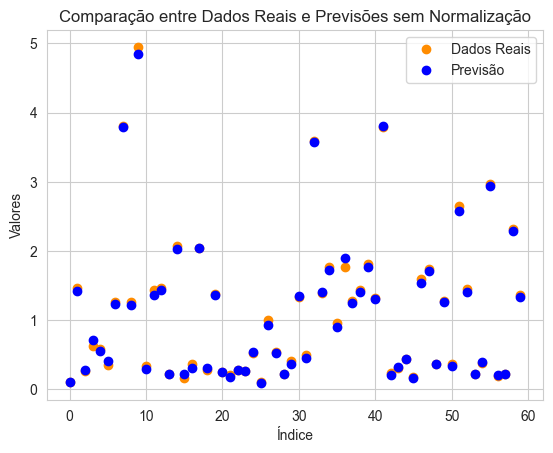

In [11]:
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)
mse_train = mean_squared_error(y_train, predict_train)
mse_test = mean_squared_error(y_test, predict_test)
print(f"Risco Empírico (MSE) Treinamento: {mse_train:.3f}")
print(f"Risco Estrutural (MSE) Teste: {mse_test:.3f}")

sns.set_style("whitegrid")
plt.plot(y_test[:60].values, 'o', color="darkorange", label="Dados Reais")
plt.plot(predict_test[:60], 'o', color="blue", label="Previsão")
plt.xlabel("Índice")
plt.ylabel("Valores")
plt.title("Comparação entre Dados Reais e Previsões sem Normalização")
plt.legend()
plt.show()

# Dimensão VC

A **Dimensão VC** é uma métrica teórica que quantifica a capacidade de um modelo de aprendizado estatístico de se ajustar a diferentes conjuntos de dados. Ela é um indicador da complexidade do modelo, refletindo sua flexibilidade em aprender padrões a partir dos dados.

### O que é uma Dimensão VC Alta ou Baixa?

- **Dimensão VC Alta**: 
    - **O que é**: Um modelo com uma Dimensão VC alta tem uma capacidade significativa de se ajustar aos dados.
    - **Vantagens**: Pode capturar padrões complexos e sutis nos dados.
    - **Desvantagens**: Risco de overfitting, onde o modelo aprende o ruído dos dados como se fosse um padrão legítimo.
    - **Exemplo**: Redes neurais profundas geralmente têm uma Dimensão VC alta.
  
- **Dimensão VC Baixa**: 
    - **O que é**: Um modelo com uma Dimensão VC baixa tem capacidade limitada de se ajustar aos dados.
    - **Vantagens**: Menor risco de overfitting.
    - **Desvantagens**: Pode não ser capaz de capturar padrões mais complexos, levando ao underfitting.
    - **Exemplo**: Uma regressão linear tem uma Dimensão VC baixa.

### Como Balancear?
O objetivo é encontrar um equilíbrio, escolhendo um modelo com a Dimensão VC adequada para o problema específico, evitando tanto o overfitting quanto o underfitting.




In [12]:
# Dividindo o X_temp em três conjuntos de treinamento de tamanhos iguais
X_train1, X_temp, y_train1, y_temp = train_test_split(X_train, y_train, test_size=(2/3), random_state=42)
X_train2, X_train3, y_train2, y_train3 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_trains = [X_train1, X_train2, X_train3]
y_trains = [y_train1, y_train2, y_train3]

def train_model(X_train,y_train, X_val, y_val):
    model = create_l1_l2_model(input_shape)
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=3,
        verbose=1,
        mode='min'
    )
    model.fit(
        X_train, y_train,
        epochs=10,
        verbose=0,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping]
    )
    return model
# Treinando e avaliando modelos
for cont in range(3):
    model = train_model(X_trains[cont],y_trains[cont], X_val, y_val)

    train_error = mean_squared_error(y_trains[cont], model.predict(X_trains[cont]))
    test_error = mean_squared_error(y_test, model.predict(X_test))
    
    print(f"Subconjunto de treinamento {cont} (Tamanho {len(y_trains[cont])}):")
    print(f"Erro de treinamento: {train_error:.5f}")
    print(f"Erro de teste: {test_error:.5f}\n")

3363/3363 [==============================] - 2s 475us/step
Subconjunto de treinamento 0 (Tamanho 51232):
Erro de treinamento: 0.00288
Erro de teste: 0.00288

3363/3363 [==============================] - 2s 472us/step
Subconjunto de treinamento 1 (Tamanho 51232):
Erro de treinamento: 0.00155
Erro de teste: 0.00158

3363/3363 [==============================] - 2s 470us/step
Subconjunto de treinamento 2 (Tamanho 51232):
Erro de treinamento: 0.00315
Erro de teste: 0.00309



## Consistência do Erro

- **Importância**: A consistência nos erros de treinamento e teste indica um alinhamento adequado entre a capacidade do modelo e a complexidade dos dados.
- **Exemplo**: Um modelo com alta Dimensão VC pode apresentar baixo erro de treinamento, mas alto erro de teste, sinalizando overfitting.

## Variação entre Subconjuntos

- **Relevância**: A variação nos erros entre diferentes subconjuntos reflete a influência dos dados específicos no treinamento.
- **Análise**: Uma variação não drasticamente diferente indica que o modelo é suficientemente flexível para se adaptar a diferentes subconjuntos de dados.
- **Exemplo**: Um modelo com baixa Dimensão VC pode apresentar grande variação nos erros, indicando sua incapacidade de se ajustar bem a variações nos dados.

## Relação com a Dimensão VC

- **Estimativa da Dimensão VC**: Usamos métricas como erro de treinamento e teste para ter uma ideia da Dimensão VC do modelo.
- **Análise dos Erros**: 
  - **Overfitting**: Erros de treinamento baixos e erros de teste altos indicam uma Dimensão VC muito alta.
  - **Underfitting**: Erros de treinamento e teste altos indicam uma Dimensão VC muito baixa.
- **Conclusão**: O modelo deve ter uma capacidade adequada para os dados, com erros de treinamento e teste consistentes em diferentes subconjuntos.

## Conclusão

- **Avaliação Final**: A análise do risco estrutural e da Dimensão VC é crucial para entender e melhorar a performance do modelo.
- **Próximos Passos**: Experimentar com modelos de diferentes complexidades e observar a variação nos erros de treinamento e teste pode fornecer insights mais profundos sobre a Dimensão VC do modelo.

## Dilema Bias-Variance

O **Dilema Bias-Variance** é um problema fundamental no aprendizado de máquina, referindo-se ao trade-off entre o erro devido a suposições simplistas (bias) e o erro devido a excessiva sensibilidade aos dados de treinamento (variance).

# Bias e Variance:

- **Bias Alto**:
    - **O que é**: Erro devido a suposições simplistas sobre a forma do relacionamento entre as variáveis.
    - **Consequências**: Erro sistemático e consistente nos dados, levando a underfitting.
    - **Quando é Bom**: Quando sabemos que a relação entre as variáveis é de fato simples.
  
- **Variance Alta**:
    - **O que é**: Erro devido a excessiva sensibilidade aos dados de treinamento.
    - **Consequências**: O modelo se ajusta demais aos dados de treinamento, capturando o ruído como padrão, levando a overfitting.
    - **Quando é Bom**: Quando temos grandes volumes de dados e a complexidade real do problema é alta.

### Como Balancear?
O objetivo é minimizar tanto o bias quanto a variance para construir um modelo robusto e confiável que performe bem em dados não vistos, encontrando um ponto de equilíbrio que minimize o erro total.

3363/3363 [==============================] - 2s 463us/step


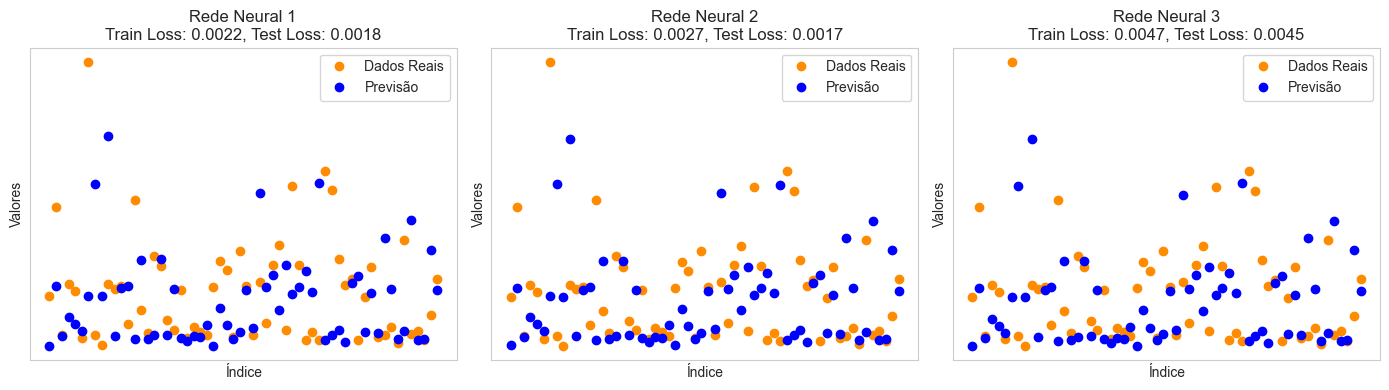

In [13]:
# Função para plotar os resultados
def plot_results_nn(model, title, subplot, X_train, y_train, X_test, y_test):
    history = model.fit(X_train, y_train, epochs=5, verbose=0)
    train_loss = history.history['loss'][-1]  # Pega o último loss de treinamento
    predict = model.predict(X_test)
    test_loss = model.evaluate(X_test, y_test, verbose=0)  # Calcula o loss de teste
    ax = plt.subplot(subplot)
    plt.setp(ax, xticks=(), yticks=())
    sns.set_style("whitegrid")
    plt.plot(y_train[:60].values, 'o', color="darkorange", label="Dados Reais")
    plt.plot(predict[:60], 'o', color="blue", label="Previsão")
    plt.xlabel("Índice")
    plt.ylabel("Valores")
    # Adiciona o loss de treino e teste ao título
    plt.title(f"{title}\nTrain Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
    plt.legend()


model_1 = Sequential()
model_1.add(Dense(1, activation='linear',  input_shape=(input_shape,)))  # Camada de entrada e única camada oculta
model_1.compile(optimizer='adam', loss='mse')

model_2 = Sequential()
model_2.add(Dense(50, activation='relu',  input_shape=(input_shape,)))  # Camada de entrada
model_2.add(Dense(30, activation='relu'))  
model_2.add(Dense(30, activation='relu'))  
model_2.add(Dense(1, activation='linear'))
model_2.compile(optimizer='adam', loss='mse')

model_3 = Sequential()
model_3.add(Dense(128, activation='relu',  input_shape=(input_shape,)))  # Camada de entrada
model_3.add(Dense(64, activation='relu'))  
model_3.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))  
model_3.add(Dense(8, activation='relu'))  
model_3.add(Dense(1, activation='linear'))
model_3.compile(optimizer='adam', loss='mse')

# Plotando os resultados
plt.figure(figsize=(14, 4))

# Passe X_train, y_train, X_test e y_test como argumentos adicionais para plot_results_nn
plot_results_nn(model_1, "Rede Neural 1", 131, X_train, y_train, X_test, y_test)
plot_results_nn(model_2, "Rede Neural 2", 132, X_train, y_train, X_test, y_test)
plot_results_nn(model_3, "Rede Neural 3", 133, X_train, y_train, X_test, y_test)

plt.tight_layout()
plt.show()


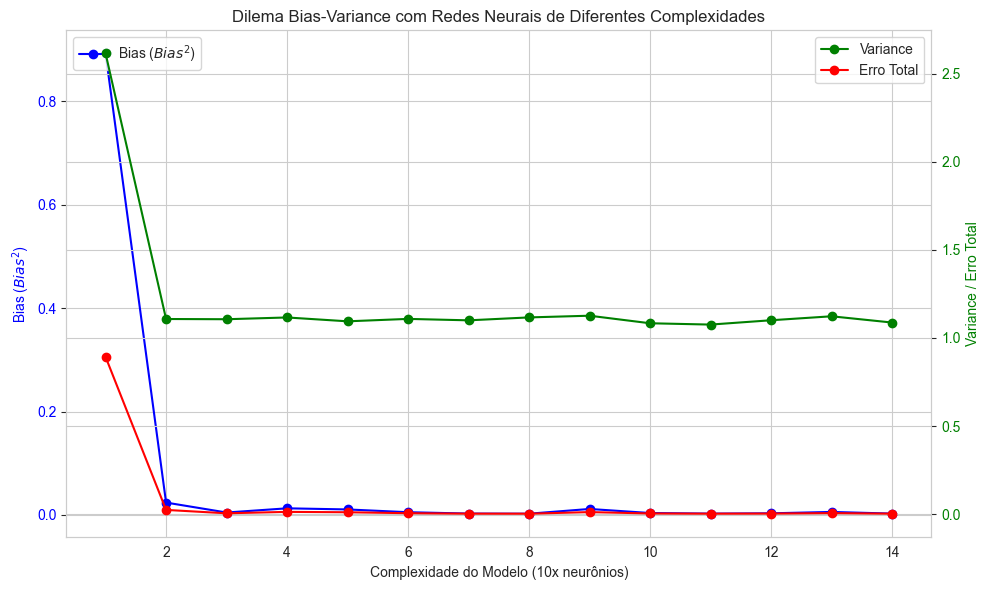

In [14]:
from IPython.display import clear_output
import numpy as np

# Função para calcular bias, variance e erro total
def calculate_bias_variance(models, X_train, X_test, y_train, y_test):
    biases, variances, errors = [], [], []
    for model in models:
        model.fit(X_train, y_train, epochs=20, verbose=0)  # Treinando cada modelo
        predictions = model.predict(X_test).flatten()  # Previsões do modelo
        
        # Calculando bias, variance e erro total
        bias = np.mean((predictions - y_test.values.flatten()) ** 2)
        variance = np.var(predictions)
        error = mean_squared_error(y_test.values.flatten(), predictions)
        
        biases.append(bias)
        variances.append(variance)
        errors.append(error)
    return biases, variances, errors

# Criando modelos de redes neurais correspondentes a diferentes "complexidades"
models = []
for cont in range(1, 15):
    model = Sequential()
    model.add(Dense(10*cont , activation='relu',input_shape=(X_train.shape[1],)))   # Camada de entrada e oculta, aumentando neurônios conforme o loop
    model.add(Dense(1, activation='linear'))  # Camada de saída
    model.compile(optimizer='adam', loss='mse')
    models.append(model)

biases, variances, errors = calculate_bias_variance(models, X_train[:2500], X_test, y_train[:2500], y_test)
clear_output(wait=True)

plt.figure(figsize=(10, 6))

# Criando um eixo para bias
ax1 = plt.gca()
ax1.plot(range(1, 15), biases, label='Bias ($Bias^2$)', marker='o', color='blue')
ax1.set_xlabel('Complexidade do Modelo (10x neurônios)')
ax1.set_ylabel('Bias ($Bias^2$)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criando um segundo eixo para variância e erro total
ax2 = ax1.twinx()
ax2.plot(range(1, 15), variances, label='Variance', marker='o', color='green')
ax2.plot(range(1, 15), errors, label='Erro Total', marker='o', color='red')
ax2.set_ylabel('Variance / Erro Total', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Dilema Bias-Variance com Redes Neurais de Diferentes Complexidades')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# À medida que a complexidade do modelo (número de neurônios) aumenta, o bias tende a diminuir, mas a variância tede a aumentar.
# O erro total tem um ponto de mínimo, onde a combinação de bias e variância é ótima.

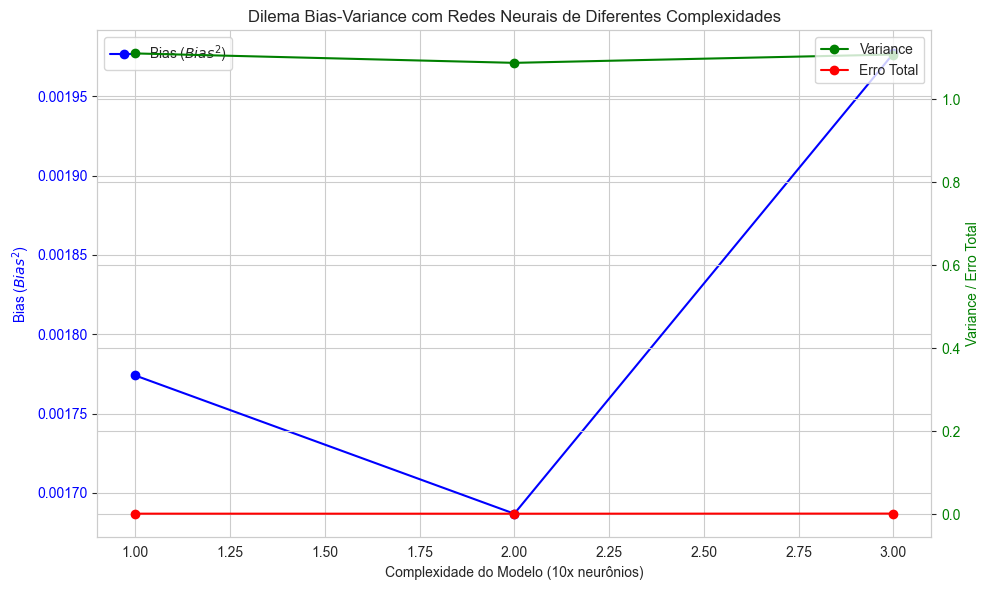

In [15]:
from IPython.display import clear_output
import numpy as np

# Função para calcular bias, variance e erro total
def calculate_bias_variance(models, X_test, y_test):
    biases, variances, errors = [], [], []
    for model in models:
        predictions = model.predict(X_test).flatten()  # Previsões do modelo
        
        # Calculando bias, variance e erro total
        bias = np.mean((predictions - y_test.values.flatten()) ** 2)
        variance = np.var(predictions)
        error = mean_squared_error(y_test.values.flatten(), predictions)
        
        biases.append(bias)
        variances.append(variance)
        errors.append(error)
    return biases, variances, errors


# Criando modelos de redes neurais correspondentes a diferentes "complexidades"
models = [model_1, model_2, model_3]

biases, variances, errors = calculate_bias_variance(models, X_test, y_test)
clear_output(wait=True)

plt.figure(figsize=(10, 6))

# Criando um eixo para bias
ax1 = plt.gca()
ax1.plot(range(1, 4), biases, label='Bias ($Bias^2$)', marker='o', color='blue')
ax1.set_xlabel('Complexidade do Modelo (10x neurônios)')
ax1.set_ylabel('Bias ($Bias^2$)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criando um segundo eixo para variância e erro total
ax2 = ax1.twinx()
ax2.plot(range(1, 4), variances, label='Variance', marker='o', color='green')
ax2.plot(range(1, 4), errors, label='Erro Total', marker='o', color='red')
ax2.set_ylabel('Variance / Erro Total', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Dilema Bias-Variance com Redes Neurais de Diferentes Complexidades')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

O Dataset audi.csv representa informações de carros da marca audi no Reino Unido, tendo com 9 atriburos e uma classe alvo que é "price", que representa a o valor do carro (ou coleção).


# 1 - Leia  abase de dados e converta valores textuais para numéricos;


In [16]:
df2 = pd.read_csv("audi.csv")

In [17]:
df2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [19]:
# Obtém os valores únicos para cada coluna
unique_values_model = df2['model'].unique()
unique_values_transmission = df2['transmission'].unique()
unique_values_fuelType = df2['fuelType'].unique()

# Exibe os valores únicos
print("Valores únicos em 'model':")
print(unique_values_model)

print("\nValores únicos em 'transmission':")
print(unique_values_transmission)

print("\nValores únicos em 'fuelType':")
print(unique_values_fuelType)


Valores únicos em 'model':
[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']

Valores únicos em 'transmission':
['Manual' 'Automatic' 'Semi-Auto']

Valores únicos em 'fuelType':
['Petrol' 'Diesel' 'Hybrid']


In [20]:
round(df2.isna().sum() * 100 / len(df2), 4)


model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

In [21]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Separando a base em X e y
X = df2.drop('price', axis=1)  # X
y = df2[['price']]  # y

# Convertendo categorias em variáveis numéricas
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])


# 2 - Separe a base em X e y de treinamento (80%) e teste (20%), normalize os dados de treinamento com fit_transform e em seguida normalize os dados de teste com o transform;


In [22]:
# Criando os normalizadores
normalizador_features = MinMaxScaler()

# Normalizando as features
X_normalized = normalizador_features.fit_transform(X)

# Dividindo os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


# 3 - Defina um modelo com 12 camadas ocultas (sem dropout e regularização de kernel) e verifique o risco empírico dele, comparando valores previstos de treinamento e teste (não esqueça de dessnormalizar os valores para os cálculos das métricas)


In [23]:
#import das bibliotecas necessárias
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns  # Importando seaborn para melhorar a estética dos gráficos
from sklearn.metrics import mean_squared_error
from tensorflow.keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_normalized = scaler_X.fit_transform(X_train)
y_train_normalized = scaler_y.fit_transform(y_train)

X_test_normalized = scaler_X.transform(X_test)
y_test_normalized = scaler_y.transform(y_test)
model = Sequential()

# Adicione 12 camadas ocultas
for _ in range(12):
    model.add(Dense(64, activation='relu'))

# Camada de saída
model.add(Dense(1, activation='linear'))

# Compilando o modelo
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train_normalized, y_train_normalized, epochs=50, batch_size=32, verbose=1)

# Previsões nos dados de treinamento e teste
y_train_pred_normalized = model.predict(X_train_normalized)
y_test_pred_normalized = model.predict(X_test_normalized)

# Desnormalizar as previsões
y_train_pred = scaler_y.inverse_transform(y_train_pred_normalized)
y_test_pred = scaler_y.inverse_transform(y_test_pred_normalized)

# Calcule as métricas
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'MSE (Treinamento): {mse_train:.4f}')
print(f'R^2 (Treinamento): {r2_train:.4f}')

print(f'MSE (Teste): {mse_test:.4f}')
print(f'R^2 (Teste): {r2_test:.4f}')



Epoch 1/50


267/267 [==============================] - 2s 818us/step - loss: 0.0021
Epoch 2/50
267/267 [==============================] - 0s 846us/step - loss: 8.9896e-04
Epoch 3/50
267/267 [==============================] - 0s 814us/step - loss: 7.6557e-04
Epoch 4/50
267/267 [==============================] - 0s 812us/step - loss: 7.1038e-04
Epoch 5/50
267/267 [==============================] - 0s 833us/step - loss: 6.7071e-04
Epoch 6/50
267/267 [==============================] - 0s 814us/step - loss: 6.2468e-04
Epoch 7/50
267/267 [==============================] - 0s 810us/step - loss: 5.8283e-04
Epoch 8/50
267/267 [==============================] - 0s 804us/step - loss: 6.1029e-04
Epoch 9/50
267/267 [==============================] - 0s 827us/step - loss: 5.7138e-04
Epoch 10/50
267/267 [==============================] - 0s 812us/step - loss: 5.4059e-04
Epoch 11/50
267/267 [==============================] - 0s 811us/step - loss: 5.5703e-04
Epoch 12/50
267/267 [==============================] - 0

Os resultados que você obteve indicam o desempenho do seu modelo de rede neural com 12 camadas ocultas nos dados de treinamento e teste. Aqui está o que esses resultados significam:

MSE (Erro Quadrático Médio):

MSE (Treinamento): 7.883.188,89
MSE (Teste): 8.861.639,43
O MSE é uma medida que avalia a média dos quadrados das diferenças entre os valores previstos e os valores reais. Quanto menor o MSE, melhor. Portanto, um MSE menor indica um melhor ajuste do modelo aos dados.

R^2 (Coeficiente de Determinação):

R^2 (Treinamento): 0,9410
R^2 (Teste): 0,9414
O coeficiente de determinação (R^2) mede a proporção da variabilidade nos dados que é explicada pelo modelo. Ele varia de 0 a 1, onde 1 indica um ajuste perfeito do modelo aos dados. Nesse caso, um R^2 próximo a 1 indica que seu modelo explica uma grande parte da variabilidade nos dados.

Em resumo, os resultados parecem bastante bons. Seu modelo tem um MSE relativamente baixo e um R^2 alto tanto nos dados de treinamento quanto nos dados de teste. No entanto, é importante observar que, em alguns casos, um R^2 muito alto nos dados de treinamento pode indicar superajuste (overfitting), o que significa que o modelo pode não generalizar bem para novos dados. Portanto, é importante avaliar o desempenho do modelo com cuidado, considerando os objetivos do seu projeto.


# 4 - Plote um gráfico com os valores reais e preditos de treinamento;


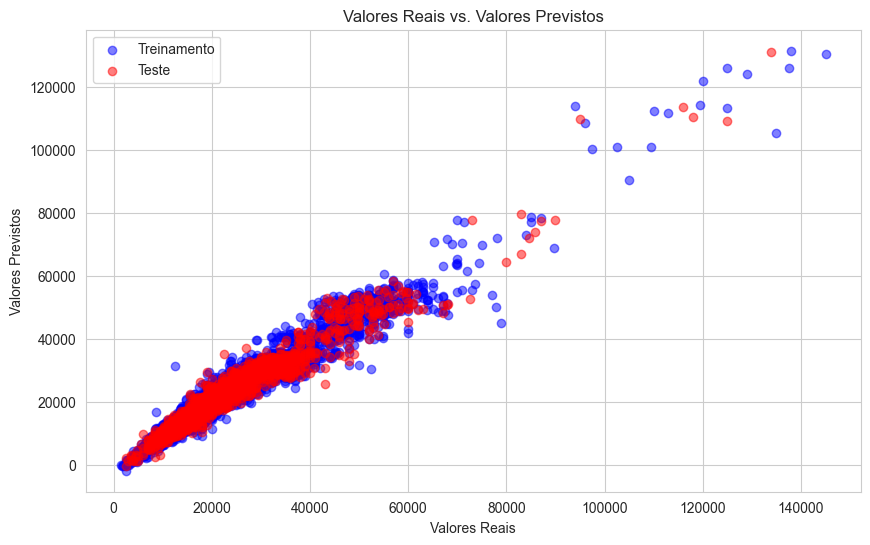

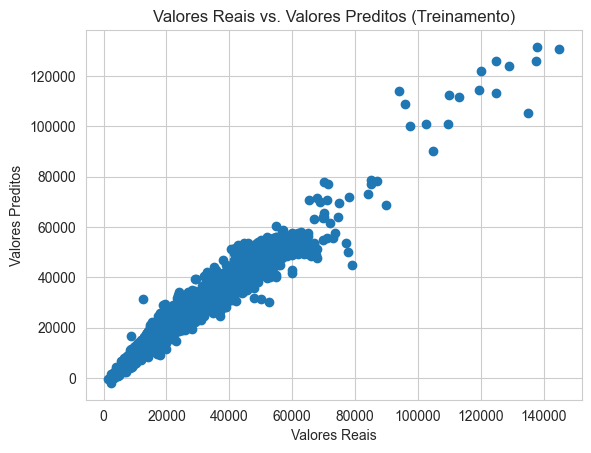

In [24]:
# Dados reais do conjunto de teste (desnormalizados)
y_test_real = scaler_y.inverse_transform(y_test_normalized)

# Gráfico de dispersão para comparar valores reais e previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, label='Treinamento', color='blue', alpha=0.5)
plt.scatter(y_test_real, y_test_pred, label='Teste', color='red', alpha=0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.legend()
plt.title('Valores Reais vs. Valores Previstos')
plt.show()# Scatter plot dos valores reais vs. valores preditos de treinamento
plt.scatter(y_train, y_train_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs. Valores Preditos (Treinamento)')
plt.show()


# 5 - Plote um gráfico com os valores reais e preditos de teste;


In [25]:
#codigo feito na questão anterior



# 6 - Analizando as 3 questões anteriores, o modelo possui um alto, baixo ou médio risco empírico? Justifique sua resposta.


Considerando a relação que o MSE (quanto menor, melhor) tem com o Risco Empírico (menor risco empirico = baixo MSE), o que se pode afirmar aqui aqui é que o risco foi baixo, mas não exclui a possibilidade dos dados estarem sobreajustados (overfitting)

Lembrando que, a relação entre risco empirico e ajuste é: alto risco = underfitting / baixo risco =  overfitting

O que pode excluir esse sobreajuste é observar o R² (quanto mais proximo de 1 melhor) que indica como o aprendizado está lidando com os dados de texto, se está sendo capaz de generalizar bem os dados. 




# 7 -  Diria que o modelo possui underfitting, overfitting ou nenhum dos dois? Justifique sua resposta.


Muito embora o resutado do R² seja promissor (indicando que o modelo está explicando bem e sendo capaz de generalizar os dados de teste), é importante observar que o MSE de teste é um pouco mais alto do que o de treinamento, indicando uma possível ligeira sobreajuste. Portanto, é essencial continuar monitorando o desempenho do modelo e, se necessário, realizar ajustes para melhorar ainda mais a generalização.


# 8 - Se fosse aplicar regularização de kernel e/ou dropout, como ficaria o seu modelo mantendo as mesmas camadas ocultas? Justifique sua resposta.


In [27]:
model = Sequential()

# Adicione 12 camadas ocultas com regularização L2 e Dropout
for _ in range(12):
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  # Regularização L2
    model.add(Dropout(0.2))  # Dropout com probabilidade de 0.2 (ajuste conforme necessário)

# Camada de saída
model.add(Dense(1, activation='linear'))

# Compilando o modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Previsões nos dados de treinamento e teste
y_train_pred_normalized = model.predict(X_train_normalized)
y_test_pred_normalized = model.predict(X_test_normalized)

# Desnormalizar as previsões
y_train_pred = scaler_y.inverse_transform(y_train_pred_normalized)
y_test_pred = scaler_y.inverse_transform(y_test_pred_normalized)

# Calcule as métricas
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'MSE (Treinamento): {mse_train:.4f}')
print(f'R^2 (Treinamento): {r2_train:.4f}')

print(f'MSE (Teste): {mse_test:.4f}')
print(f'R^2 (Teste): {r2_test:.4f}')

67/67 [==============================] - 0s 530us/step
MSE (Treinamento): 590484244.1918
R^2 (Treinamento): -3.4158
MSE (Teste): 623929949.3629
R^2 (Teste): -3.1284



# 9 - Verifique a flexibilidade do novo modelo com dropout e/ou regularização de kernel (Risco estrutural). Separe a base de treinamento em 4 subconjuntos do mesmo tamanho, treine o modelo 4 vezes com as 4 bases de treinamento diferentes, em seguida exiba o mse dos dados de treinamento e teste dos 4 modelos (não esqueça de desnormalizar os valores antes de gerar as métricas).


In [28]:
from sklearn.model_selection import train_test_split

# Divida a base de treinamento em 4 subconjuntos
X_train_splits = []
y_train_splits = []

# Supondo que você tem X_train e y_train como dados de treinamento normalizados
for _ in range(4):
    X_split, _, y_split, _ = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
    X_train_splits.append(X_split)
    y_train_splits.append(y_split)

# Inicialize listas para armazenar os resultados
mse_train_results = []
mse_test_results = []

# Loop através dos 4 subconjuntos e treine o modelo
for i in range(4):
    # Treine o modelo com o subconjunto i
    model.fit(X_train_splits[i], y_train_splits[i], epochs=50, batch_size=32, verbose=0)
    
    # Faça previsões nos dados de treinamento e teste
    y_train_pred_normalized = model.predict(X_train_splits[i])
    y_test_pred_normalized = model.predict(X_test_normalized)
    
    # Desnormalize as previsões
    y_train_pred = scaler_y.inverse_transform(y_train_pred_normalized)
    y_test_pred = scaler_y.inverse_transform(y_test_pred_normalized)
    
    # Calcule o MSE para dados de treinamento e teste e armazene-os
    mse_train = mean_squared_error(y_train_splits[i], y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    mse_train_results.append(mse_train)
    mse_test_results.append(mse_test)

# Exiba os resultados do MSE para os 4 modelos
for i in range(4):
    print(f'MSE (Treinamento - Modelo {i + 1}): {mse_train_results[i]:.4f}')
    print(f'MSE (Teste - Modelo {i + 1}): {mse_test_results[i]:.4f}')
    print()

67/67 [==============================] - 0s 531us/step
MSE (Treinamento - Modelo 1): 7696781683199004672.0000
MSE (Teste - Modelo 1): 8075130954793459712.0000

MSE (Treinamento - Modelo 2): 8946743615717444608.0000
MSE (Teste - Modelo 2): 9125745897015618560.0000

MSE (Treinamento - Modelo 3): 7637457863031161856.0000
MSE (Teste - Modelo 3): 7880256842713600000.0000

MSE (Treinamento - Modelo 4): 8469581016114827264.0000
MSE (Teste - Modelo 4): 8703166163356993536.0000



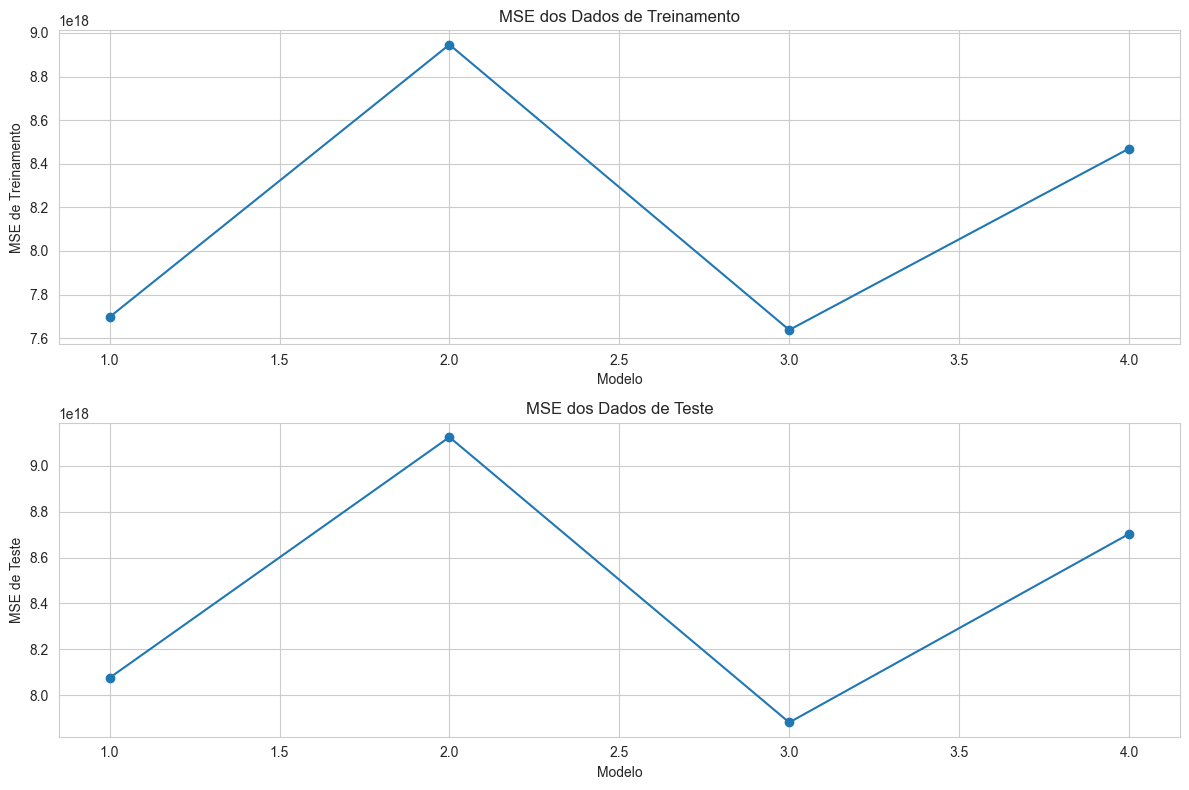

In [29]:
# Função para plotar os resultados do treinamento
def plot_training_results(mse_train_results, mse_test_results):
    plt.figure(figsize=(12, 8))
    
    # Plot MSE de treinamento
    plt.subplot(2, 1, 1)
    plt.plot(range(1, 5), mse_train_results, marker='o', linestyle='-')
    plt.title('MSE dos Dados de Treinamento')
    plt.xlabel('Modelo')
    plt.ylabel('MSE de Treinamento')
    
    # Plot MSE de teste
    plt.subplot(2, 1, 2)
    plt.plot(range(1, 5), mse_test_results, marker='o', linestyle='-')
    plt.title('MSE dos Dados de Teste')
    plt.xlabel('Modelo')
    plt.ylabel('MSE de Teste')
    
    plt.tight_layout()
    plt.show()

# Suponha que você tenha mse_train_results e mse_test_results preenchidos com os valores apropriados
plot_training_results(mse_train_results, mse_test_results)


# 10 - Como você classificaria o a dimensão VC deste modelo? Justifique sua resposta.


Em termos gerais, quanto maior a VC-dimensão, maior a capacidade do modelo de se ajustar a conjuntos de dados diferentes, incluindo dados de treinamento e teste. Por outro lado, uma VC-dimensão muito alta pode levar ao overfitting, onde o modelo se ajusta demais aos dados de treinamento e não generaliza bem para novos dados.

Observando os resultados de MSE (Erro Quadrático Médio) nos modelos treinados com diferentes subconjuntos de dados de treinamento, podemos tirar algumas conclusões:

Os valores de MSE de treinamento e teste variam significativamente entre os modelos, indicando que o desempenho do modelo é sensível à escolha dos dados de treinamento.

Os valores de MSE de teste são consistentemente maiores do que os valores de MSE de treinamento para todos os modelos. Isso sugere que os modelos estão sobreajustando os dados de treinamento, pois não generalizam tão bem para os dados de teste.

Os valores de MSE são muito altos, o que indica que o modelo não está se ajustando bem aos dados em geral. Isso pode ser devido a uma série de fatores, incluindo o tamanho da rede neural, a taxa de aprendizado, a regularização insuficiente e outros hiperparâmetros.

Com base nessas observações, podemos inferir que a VC-dimensão do modelo atualmente é alta, pois ele está tentando se ajustar a diferentes subconjuntos de dados de treinamento, mas não está generalizando bem para os dados de teste. No entanto, a alta VC-dimensão não é necessariamente uma característica desejável, pois pode levar a overfitting e desempenho ruim em novos dados.

Para melhorar o desempenho do modelo e controlar sua VC-dimensão, você pode considerar ajustar os hiperparâmetros, aplicar técnicas de regularização mais eficazes (como regularização L2 mais forte ou dropout mais agressivo), ajustar a arquitetura da rede ou coletar mais dados, dependendo do seu problema específico.

In [ ]:

# Dividindo os dados em treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(df2[['X']], df2['y'], test_size=0.2, random_state=42)

# Modelo de Overfitting: Polinomial de grau 15
overfitting_model = make_pipeline(PolynomialFeatures(15), LinearRegression())
overfitting_model.fit(X_train, y_train)
overfitting_predictions = overfitting_model.predict(X_test)

# Modelo de Underfitting: Regressão Linear Simples
underfitting_model = LinearRegression()
underfitting_model.fit(X_train, y_train)
underfitting_predictions = underfitting_model.predict(X_test)

# Modelo Equilibrado: Polinomial de grau 3
balanced_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
balanced_model.fit(X_train, y_train)
balanced_predictions = balanced_model.predict(X_test)

# Calculando o Risco Empírico (MSE) para ambos os modelos
mse_overfitting = mean_squared_error(y_test, overfitting_predictions)
mse_underfitting = mean_squared_error(y_test, underfitting_predictions)
mse_balanced = mean_squared_error(y_test, balanced_predictions)

# Imprimindo os erros quadráticos médios para ambos os modelos
print(f"Risco Empírico do modelo Overfitting (MSE): {mse_overfitting:.3f}")
print(f"Risco Empírico do modelo Underfitting (MSE): {mse_underfitting:.3f}")
print(f"Risco Empírico do modelo equilibrado (MSE): {mse_balanced:.3f}")

# Plotando os resultados
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', s=20, label='Dados reais')  # Plotando os dados reais
plt.plot(X_test, overfitting_predictions, color='red', label='Overfitting (polinomial de grau 15)')  # Plotando as previsões do modelo overfitting
plt.plot(X_test, underfitting_predictions, color='green', linestyle='--', label='Underfitting (linear simples)')  # Plotando as previsões do modelo underfitting
plt.plot(X_test, balanced_predictions, color='orange', linestyle='-.', label='Modelo Equilibrado (polinomial de grau 3')  # Plotando as previsões do modelo equilibrado
plt.xlabel('X')
plt.ylabel('y')
plt.title('Overfitting vs. Underfitting')
plt.legend()  # Adicionando a legenda ao gráfico
plt.show()  # Mostrando o gráfico